In [1]:
# importing the basic libraries
import numpy as np
import pandas as pd

# importing matplotlib for data visualization
import matplotlib.pyplot as plt

In [3]:
# lets read the dataset

data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# lets take only 200 rows as we are only going to visualize it
data = data.loc[:199,:]
print(data.shape)

(200, 35)


In [4]:
# let's check the columns present in the dataset

data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Lets try to analyze the values present in Attrition column of the employee dataset

# here we are using value_counts() which return the values related to each of the categories present in the attribute
x = data['Attrition'].value_counts()

# printing the values
print(x)

No     170
Yes     30
Name: Attrition, dtype: int64


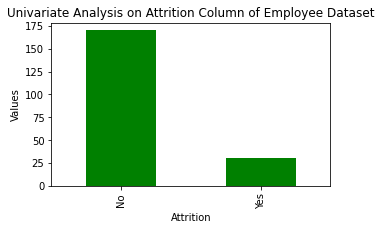

In [6]:
# lets use the the values in x to plot 

plt.rcParams['figure.figsize'] = (5, 3)
x.plot(kind = 'bar', color ='green')

plt.title('Univariate Analysis on Attrition Column of Employee Dataset', fontsize = 12)
plt.xlabel('Attrition')
plt.ylabel('Values')
plt.show()

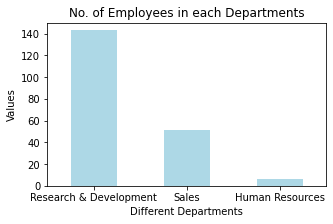

In [7]:
# analyzing the attribute Department

data['Department'].value_counts().plot(kind = 'bar', color = 'lightblue')
plt.ylabel('Values')
plt.xlabel('Different Departments')
plt.xticks(rotation = 360)
plt.title('No. of Employees in each Departments', fontsize =12)
plt.show()

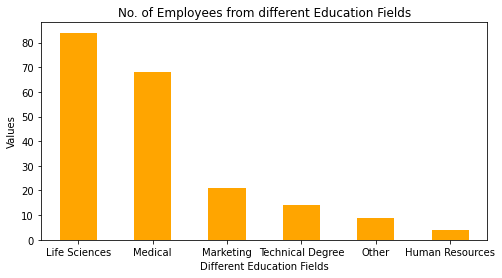

In [8]:
# analyzing the Education Field

plt.rcParams['figure.figsize'] = (8, 4)
data['EducationField'].value_counts().plot(kind = 'bar', color = 'orange')
plt.ylabel('Values')
plt.xlabel('Different Education Fields')
plt.xticks(rotation = 360)
plt.title('No. of Employees from different Education Fields', fontsize =12)
plt.show()

In [9]:
# lets check the documentation of Bar Plots in Matplotlib
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   

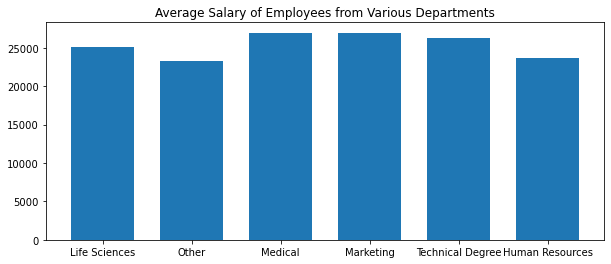

In [10]:
# lets plot Education vs Monthly Rate

plt.rcParams['figure.figsize'] = (10, 4)
plt.bar(data['EducationField'], data['MonthlyRate'], width = 0.7, align = 'center')
plt.title('Average Salary of Employees from Various Departments')
plt.show()

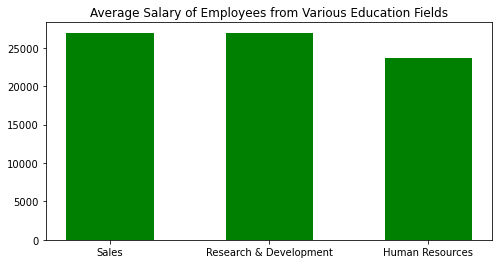

In [11]:
# lets plot Departments vs Monthly Rate

plt.rcParams['figure.figsize'] = (8, 4)
plt.bar(data['Department'], data['MonthlyRate'], color = 'green', width = 0.55, align = 'center')
plt.title('Average Salary of Employees from Various Education Fields')
plt.show()

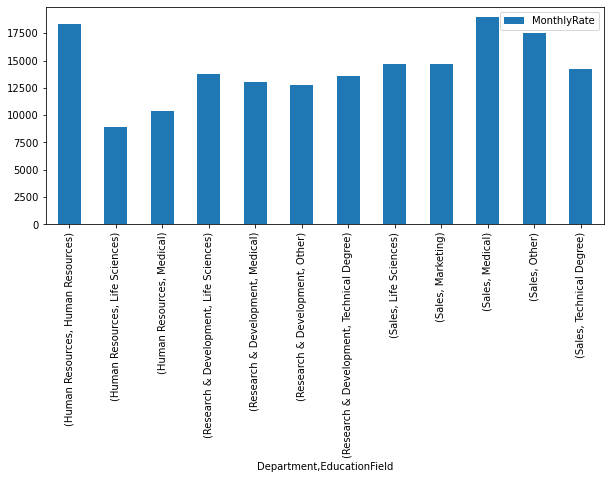

In [12]:
# lets plot Departments vs Monthly Rate

plt.rcParams['figure.figsize'] = (10, 4)
x = data.pivot_table(index = ['Department','EducationField'], values = ['MonthlyRate'], aggfunc = 'mean')
x.plot(kind = 'bar', stacked = False)
plt.xticks(rotation = 90)
plt.show()

In [13]:
# using crosstab funtion, making a cross tabular using multiple variables.
# we have used mean function to aggregate the values of Monthly rate.
# for x axis -> index: Department
# for y axis -> index: Education Field
# values (x X y) -> Monthly Rate, aggreated using mean function

x = pd.crosstab(index = data['Department'],
                columns = data['EducationField'],
                values = data['MonthlyRate'],
                aggfunc = 'mean')
x

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,18355.75,8916.000000,NaN,10425.000000,NaN,NaN
Research & Development,NaN,13771.687500,NaN,13053.540984,12780.375,13551.0
Sales,NaN,14644.684211,14645.952381,18956.833333,17519.000,14198.5


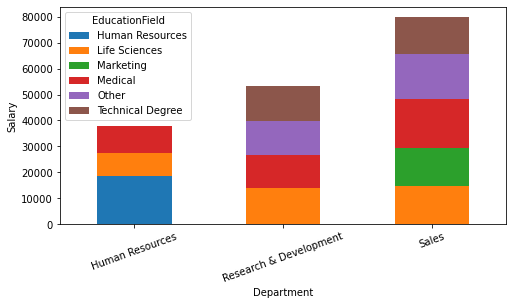

In [14]:
# lets plot a Stacked Bar Chart
# we will use x, which we have created using crosstab function

# setting the size of the plot
plt.rcParams['figure.figsize'] = (8, 4)

# keeping the Stacked option to **True**
x.plot(kind = 'bar', stacked = True)
plt.ylabel('Salary')
plt.xticks(rotation = 20)
plt.show()

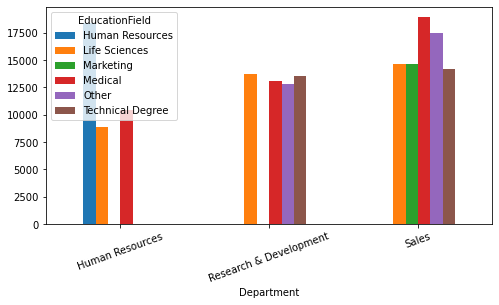

In [15]:
# Lets make a Grouped Bar Plot 
# we will be using the variable x which we have created using the cross tab function

# setting the size of the plot
plt.rcParams['figure.figsize'] = (8, 4)

# keeping the stacked option to **false**
x.plot(kind = 'bar', stacked = False)
plt.xticks(rotation = 20)
plt.show()